<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Mod5Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5 Lab 1
####Q1. Try to run the same experiment after filtering different features, 2 at a time.

In [1]:
from sklearn.datasets import make_circles
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Function to plot decision boundaries

In [2]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()

Main function to run the experiment with different feature pairs

In [3]:
def boundaryExp(X, y):
    # Try different feature pairs in a loop
    for i in range(X.shape[1]):
        for j in range(i + 1, X.shape[1]):
            pair = [i, j]

            # SVM classifier
            clf = svm.LinearSVC()
            clf.fit(X[:, pair], y)

            # Plot decision boundaries
            plotDecisionBoundary(X, y, pair, clf)

Generate synthetic data (you can replace this with your own dataset)


In [4]:
X, y = make_circles(200, factor=.1, noise=.1)


Plot original data

<ipython-input-5-33a986639792>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


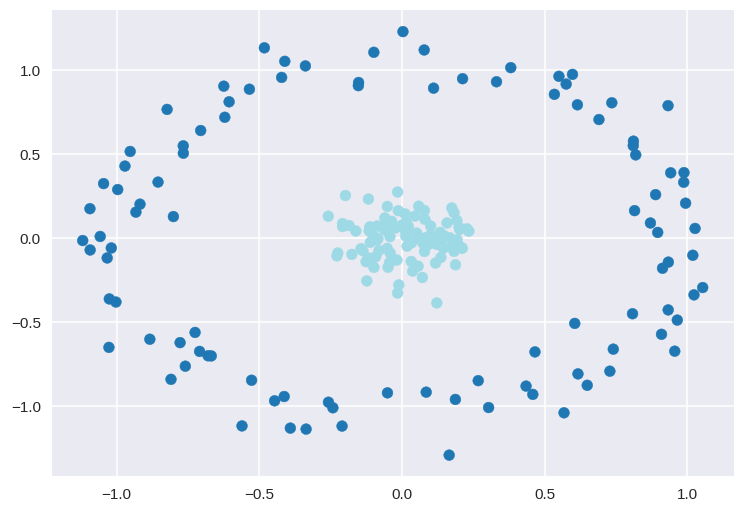

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.show()

Run the experiment with different feature pairs

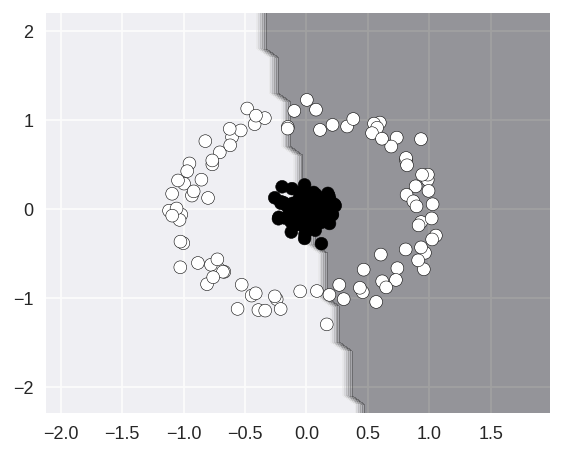

In [6]:
boundaryExp(X, y)

###Q2.Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [1]:
from sklearn.datasets import make_circles
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Function to plot decision boundaries

In [2]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()

Main function to run the experiment with different SVM kernels

In [3]:
def boundaryExp(X, y, kernel):
    # Try different feature pairs in a loop
    for i in range(X.shape[1]):
        for j in range(i + 1, X.shape[1]):
            pair = [i, j]

            # SVM classifier with different kernels
            if kernel == 'precomputed':
                clf = svm.SVC(kernel=kernel)
                gram_matrix = np.dot(X[:, pair], X[:, pair].T)
                clf.fit(gram_matrix, y)
            else:
                clf = svm.SVC(kernel=kernel)
                clf.fit(X[:, pair], y)

            # Plot decision boundaries
            plotDecisionBoundary(X, y, pair, clf)


Generate synthetic data (you can replace this with your own dataset)


In [4]:
X, y = make_circles(200, factor=.1, noise=.1)


Plot original data

<ipython-input-5-33a986639792>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


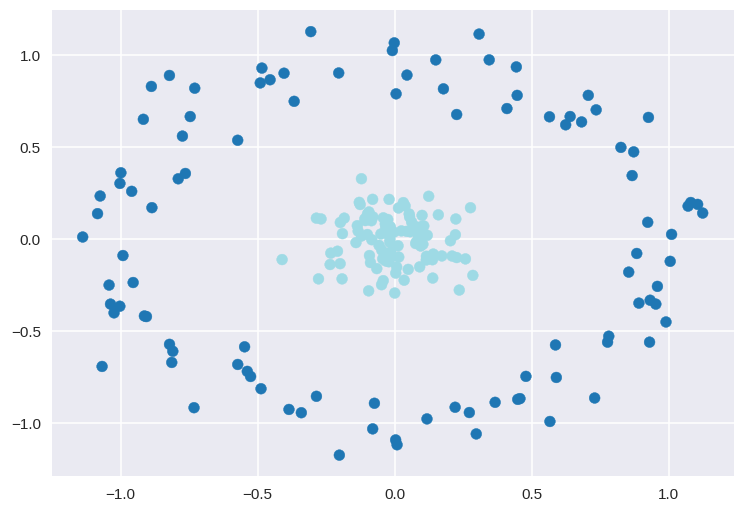

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.show()